In [4]:
import pandas as pd
import numpy as np
import json
from matplotlib import pyplot as plt
import seaborn as sns
from datetime import datetime
%matplotlib inline

In [5]:
REPORT_PATH = './TNSM_report_until_dec_1_2020.xlsx'
IEEE_REG_PATH = './regions.json'
FIELDS_PATH = './fields.json'

with open(FIELDS_PATH, 'r') as fields_file:
    COLUMNS = json.load(fields_file)

with open(IEEE_REG_PATH, 'r') as reg_file:
    REGIONS = json.load(reg_file)

country_region = {v: k for k, values in REGIONS.items() for v in values}

In [6]:
report_df = pd.read_excel(REPORT_PATH)
report_df = report_df[report_df['Manuscript ID - Original'] != 'draft']
report_df = report_df[report_df['Manuscript ID - Latest'] != 'draft']
report_df.head()

,Manuscript ID - Original,Manuscript ID - Latest,Manuscript Type,Manuscript Title,Manuscript Status,Original Submission Date,Submission Month,Submission Month Number,Submission Year,Contact Author Name,...,Latest Decision,Latest Decision Date,Accept or Reject Final Decision,Due Date of Latest Revision,# Revisions,# Resubmissions,# Days Between Original Submission & Original Decision,# Days Between Original Submission & Final Decision,# Days Since Original Submission,# Days Since Latest Submission
5,TNSM-2013-00528,TNSM-2013-00528.R1,Original Article,On-The-Fly Capture and Replay Mechanisms for M...,Accept-Not a Candidate for Best Paper Award,2013-07-31 10:12:18.999,July,7.0,2013.0,"Lin, Po-Ching",...,Accept-Not a Candidate for Best Paper Award,2014-02-04 16:47:56,Accept,NaT,1,0,138.0,188.0,2679 dagen 9 uur 53 minuten 43 seconden 779 mi...,2494 dagen 23 uur 31 minuten 0 seconden 528 mi...
6,TNSM-2013-00602,TNSM-2013-00602,Original Article,Local Area Based Content Distribution for Real...,Reject & Resubmit,2013-12-23 12:03:34.999,December,12.0,2013.0,"Dandapat, Sourav",...,Reject & Resubmit,2014-04-16 09:20:13,NaN,NaT,0,0,114.0,NaN,2534 dagen 8 uur 2 minuten 27 seconden 129 mil...,2534 dagen 8 uur 2 minuten 27 seconden 129 mil...
7,TNSM-2013-00432,TNSM-2013-00432,Original Article,Proactive Virtualized Resource Management and ...,Reject,2013-01-31 11:35:53.999,January,1.0,2013.0,"Wei, Yi",...,Reject,2013-04-27 12:19:37,Reject,NaT,0,0,86.0,86.0,2860 dagen 8 uur 30 minuten 8 seconden 413 mil...,2860 dagen 8 uur 30 minuten 8 seconden 413 mil...
8,TNSM-2016-01114,TNSM-2016-01114.R2,Original Article,Analytical Model for Elastic Scaling of Cloud-...,Accept-Not a Candidate for Best Paper Award,2016-06-16 14:09:39.000,June,6.0,2016.0,"Salah, Khaled",...,Accept-Not a Candidate for Best Paper Award,2016-12-13 12:36:38,Accept,NaT,2,0,73.0,180.0,1628 dagen 5 uur 56 minuten 23 seconden 539 mi...,1456 dagen 18 uur 53 minuten 50 seconden 62 mi...
9,TNSM-2012-00361,TNSM-2012-00361,Original Article,GUCS: A Group User Communications System,Reject,2012-10-30 02:47:56.000,October,10.0,2012.0,"Zhang, Gang",...,Reject,2013-04-27 12:27:11,Reject,NaT,0,0,179.0,179.0,2953 dagen 17 uur 18 minuten 6 seconden 559 mi...,2953 dagen 17 uur 18 minuten 6 seconden 559 mi...


In [4]:
# test if the required columns are present in the provide report

assert set(report_df.columns) == set(COLUMNS)

In [5]:
# computing complementary fields   

def get_status_category(r):
    if pd.notnull(r['Manuscript Status']):
        if 'Accept' in r['Manuscript Status']:
            return 'Accept'
        elif 'Reject' in r['Manuscript Status']:
            return 'Reject'
        elif 'Withdrawn' in r['Manuscript Status']:
            return 'Withdrawn'
        # Papers which have not been withdrawn, for which the status is not 'Reject & Resubmit' and no final decision has been made are still in process
        elif 'Withdrawn' not in r['Manuscript Status'] and 'Reject & Resubmit' != r['Manuscript Status'] and not pd.notnull(r['Accept or Reject Final Decision']) and pd.notnull(r['Revised']):
            return 'Still in process'
        else:
            return np.nan
    else: # Papers without Manuscript status are still in process
        return 'Still in process'        
    

report_df['First Decision Month Number'] = pd.DatetimeIndex(report_df['First Decision Date']).month
report_df['First Decision Year'] = pd.DatetimeIndex(report_df['First Decision Date']).year
report_df['Latest Decision Month Number'] = pd.DatetimeIndex(report_df['Latest Decision Date']).month
report_df['Latest Decision Year'] = pd.DatetimeIndex(report_df['Latest Decision Date']).year
report_df['Revised'] = report_df.apply(lambda r: '.R' in r['Manuscript ID - Latest'] if type(r['Manuscript ID - Latest']) != float else np.nan , axis=1)
report_df['Current Status Category'] = report_df.apply(get_status_category, axis=1)
report_df['Region'] = report_df['Contact Author Country/Region'].apply(lambda k: country_region[k] if pd.notnull(k) else np.nan)

In [6]:
report_df[report_df['Manuscript Status'].isnull()]

,Manuscript ID - Original,Manuscript ID - Latest,Manuscript Type,Manuscript Title,Manuscript Status,Original Submission Date,Submission Month,Submission Month Number,Submission Year,Contact Author Name,...,# Days Between Original Submission & Final Decision,# Days Since Original Submission,# Days Since Latest Submission,First Decision Month Number,First Decision Year,Latest Decision Month Number,Latest Decision Year,Revised,Current Status Category,Region
1001,TNSM-2018-02143,Draft(TNSM-2018-02143.R1),Original Article,RADS: Real-time Anomaly Detection System for C...,NaN,2018-11-06 16:41:10.000,November,11.0,2018.0,"Barbhuiya, Sakil",...,NaN,755 dagen 3 uur 24 minuten 52 seconden 680 mil...,NaN,2.0,2019.0,NaN,NaN,True,Still in process,"Region 8 (Europe, Africa, Middle East)"
1812,TNSM-2018-01867,Draft(TNSM-2018-01867.R1),Original Article,Fast Privacy-Preserving Network Function Outso...,NaN,2018-04-14 03:32:02.000,April,4.0,2018.0,"Jourjon, Guillaume",...,NaN,961 dagen 16 uur 34 minuten 0 seconden 678 mil...,NaN,6.0,2018.0,NaN,NaN,True,Still in process,Region 10 (Asia / Pacific)
1990,TNSM-2020-03034,Draft(TNSM-2020-03034.R2),Original Article,Detecting Anomalies at a TLD Name Server Based...,NaN,2020-04-30 23:14:34.999,April,4.0,2020.0,"Madariaga, Diego",...,NaN,213 dagen 20 uur 51 minuten 27 seconden 628 mi...,NaN,7.0,2020.0,NaN,NaN,True,Still in process,"Region 9 (Central, South America)"
3165,TNSM-2020-03318,Draft(TNSM-2020-03318.R1),Original Article,Optimizing All-to-All Data Transmission in WANs,NaN,2020-07-20 22:17:49.000,July,7.0,2020.0,"Tan, Hao",...,NaN,132 dagen 21 uur 48 minuten 13 seconden 407 mi...,NaN,10.0,2020.0,NaN,NaN,True,Still in process,Region 7 (Canada)
3580,TNSM-2020-03138,Draft(TNSM-2020-03138.R1),Original Article,Enabling Mobility in LTE-Compatible Mobile-edg...,NaN,2020-05-26 01:20:12.999,May,5.0,2020.0,"Aghdai, Ashkan",...,NaN,188 dagen 18 uur 45 minuten 49 seconden 773 mi...,NaN,8.0,2020.0,NaN,NaN,True,Still in process,Region 1 - 6 (U.S.A.)


In [7]:
# count_type: ['original', 'revised', 'total']

def filter_submitted_per_year(year, count_type='total'):
    if count_type == 'total':
        return report_df[report_df['Submission Year'] == year].copy()
    elif count_type == 'original':
        return report_df[(report_df['Submission Year'] == year) & (report_df['Revised'] == False)].copy()
    else:
        return report_df[(report_df['Submission Year'] == year) & (report_df['Revised'] == True)].copy()

def filter_submitted_per_date_range(from_date, to_date):
    return report_df[(report_df['Original Submission Date'] >= from_date) & (report_df['Original Submission Date'] < to_date)].copy() 


def count_submitted_per_year(year, count_type='total'):
    return filter_submitted_per_year(year, count_type).shape[0]

def count_submitted_per_date_range(from_date, to_date):
    return filter_submitted_per_date_range(from_date, to_date).shape[0] 

count_submitted_per_year(2020, 'total')
count_submitted_per_date_range('2020-01-01', '2020-11-30')

784

In [8]:
filter_submitted_per_year(2020)['Manuscript Status'].value_counts()

Reject                                            241
Awaiting Reviewer Scores                          162
Accept-Not a Candidate for Best Paper Award        79
Reject & Resubmit                                  67
Assign Reviewers;Awaiting Reviewer Scores          61
Select Reviewers                                   37
Major Revision                                     31
Make Decision                                      29
Make Recommendation                                27
Assign Reviewers                                   21
Withdrawn                                           8
Complete Checklist                                  3
Awaiting Reviewer Scores;Select Reviewers           3
Select Reviewer                                     3
Accept-Possible Candidate for Best Paper Award      3
Invite Reviewers                                    2
Awaiting Reviewer Scores;Invite Reviewers           2
Minor Revision                                      2
Name: Manuscript Status, dty

In [9]:
status_count_df = report_df.groupby(['Current Status Category', 'Submission Year']).size().unstack(fill_value=0)
status_count_df.loc["Submitted"] = status_count_df.sum()
status_count_df.loc["Acceptance rate"] = (status_count_df.loc['Accept'] / status_count_df.loc['Submitted']) * 100

In [10]:
status_count_df.round(2)

Submission Year,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0,2020.0
Current Status Category,,,,,,,,,,,
Accept,32.00,33.00,38.0,28.00,41.0,63.00,85.00,128.00,155.00,164.00,82.00
Reject,58.00,66.00,117.0,157.00,88.0,96.00,181.00,255.00,289.00,292.00,308.00
Still in process,2.00,2.00,0.0,3.00,4.0,2.00,4.00,6.00,10.00,15.00,386.00
Withdrawn,6.00,1.00,4.0,4.00,1.0,6.00,8.00,3.00,3.00,4.00,8.00
Submitted,98.00,102.00,159.0,192.00,134.0,167.00,278.00,392.00,457.00,475.00,784.00
Acceptance rate,32.65,32.35,23.9,14.58,30.6,37.72,30.58,32.65,33.92,34.53,10.46


In [11]:
subms_region_df = report_df.groupby(['Region', 'Submission Year']).size().unstack(fill_value=0)
subms_region_df = ((subms_region_df / subms_region_df.sum())*100)
subms_region_df.round(2)

Submission Year,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0,2020.0
Region,,,,,,,,,,,
Region 1 - 6 (U.S.A.),21.43,26.47,22.01,15.62,16.42,16.17,11.87,10.97,9.41,7.81,9.31
Region 10 (Asia / Pacific),33.67,28.43,40.88,41.15,41.79,46.11,38.13,48.72,47.70,52.11,47.83
Region 7 (Canada),8.16,8.82,7.55,4.69,6.72,5.39,8.63,4.85,4.81,4.22,4.85
"Region 8 (Europe, Africa, Middle East)",33.67,32.35,27.04,36.46,32.09,31.14,38.49,32.65,34.57,31.22,33.42
"Region 9 (Central, South America)",3.06,3.92,2.52,2.08,2.99,1.20,2.88,2.81,3.50,4.64,4.59


In [12]:
accept_region_df = report_df[report_df['Accept or Reject Final Decision'] == 'Accept'].groupby(['Region', 'Latest Decision Year']).size().unstack(fill_value=0)
accept_region_df = ((accept_region_df / accept_region_df.sum())*100)
accept_region_df.round(2)

Latest Decision Year,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0,2020.0
Region,,,,,,,,,,,
Region 1 - 6 (U.S.A.),14.29,23.53,38.46,26.67,13.33,19.61,17.11,16.96,15.04,8.77,9.19
Region 10 (Asia / Pacific),14.29,23.53,23.08,30.00,26.67,29.41,21.05,31.25,36.28,39.18,38.38
Region 7 (Canada),0.00,5.88,7.69,10.00,3.33,9.80,9.21,9.82,6.19,8.19,7.57
"Region 8 (Europe, Africa, Middle East)",71.43,35.29,28.21,33.33,53.33,41.18,48.68,40.18,38.05,42.11,41.62
"Region 9 (Central, South America)",0.00,11.76,2.56,0.00,3.33,0.00,3.95,1.79,4.42,1.75,3.24


In [13]:
# Longest First Review
days_original_decision_max_idx = [idx[1] for idx in report_df.loc[report_df['Revised'] == False, :].groupby(['Submission Year'])['# Days Between Original Submission & Original Decision'].nlargest(1).index]
max_original_decision_df = report_df[['Submission Year', '# Days Between Original Submission & Original Decision', 'Manuscript ID - Latest']].loc[days_original_decision_max_idx].set_index('Submission Year')
max_original_decision_df

,# Days Between Original Submission & Original Decision,Manuscript ID - Latest
Submission Year,,
2010.0,239.0,TNSM-2010-00094
2011.0,246.0,TNSM-2011-00119
2012.0,334.0,TNSM-2012-00337
2013.0,249.0,TNSM-2013-00568
2014.0,225.0,TNSM-2013-00599
2015.0,188.0,TNSM-2015-00916
2016.0,167.0,TNSM-2017-01564
2017.0,268.0,TNSM-2017-01500
2018.0,252.0,TNSM-2018-01837


In [14]:
# Longest Second+ Review
days_second_review_max_idx = [idx[1] for idx in report_df.loc[report_df['Revised'] == True, :].groupby(['Submission Year'])['# Days Between Original Submission & Original Decision'].nlargest(1).index]
max_second_review_df = report_df[['Submission Year', '# Days Between Original Submission & Original Decision', 'Manuscript ID - Latest']].loc[days_second_review_max_idx].set_index('Submission Year')
max_second_review_df

,# Days Between Original Submission & Original Decision,Manuscript ID - Latest
Submission Year,,
2010.0,337.0,TNSM-2010-00058.R1
2011.0,283.0,TNSM-2011-00202.R1
2012.0,325.0,TNSM-2012-00293.R2
2013.0,249.0,TNSM-2013-00491.R1
2014.0,158.0,TNSM-2014-00608.R1
2015.0,179.0,TNSM-2015-00777.R3
2016.0,171.0,TNSM-2016-01055.R3
2017.0,224.0,TNSM-2017-01595.R1
2018.0,266.0,TNSM-2018-02183.R2


In [15]:
# Longest Overall Review (from submission to final decision)
days_final_decision_max_idx = [idx[1] for idx in report_df.groupby(['Submission Year'])['# Days Between Original Submission & Final Decision'].nlargest(1).index]
max_final_decision_df = report_df[['Submission Year', '# Days Between Original Submission & Final Decision', 'Manuscript ID - Latest']].loc[days_final_decision_max_idx].set_index('Submission Year')
max_final_decision_df

,# Days Between Original Submission & Final Decision,Manuscript ID - Latest
Submission Year,,
2010.0,662.0,TNSM-2010-00027.R2
2011.0,606.0,TNSM-2011-00201.R2
2012.0,720.0,TNSM-2012-00293.R2
2013.0,624.0,TNSM-2013-00433.R2
2014.0,545.0,TNSM-2015-00861.R1
2015.0,777.0,TNSM-2016-01152.R3
2016.0,618.0,TNSM-2017-01269.R3
2017.0,660.0,TNSM-2018-02091.R1
2018.0,706.0,TNSM-2018-02243.R2


Text(0.5, 1.0, 'CDF: # Days Between Original Submission & Original Decision')

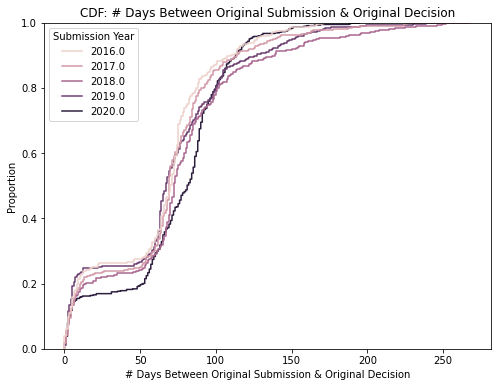

In [16]:
fig, ax = plt.subplots(figsize=(8,6))
sns.ecdfplot(data=report_df[datetime.now().year - report_df['Submission Year'] < 5], x="# Days Between Original Submission & Original Decision", hue="Submission Year", ax=ax)
ax.set_title('CDF: # Days Between Original Submission & Original Decision')

Text(0.5, 1.0, 'CDF: # Days Between Original Submission & Final Decision')

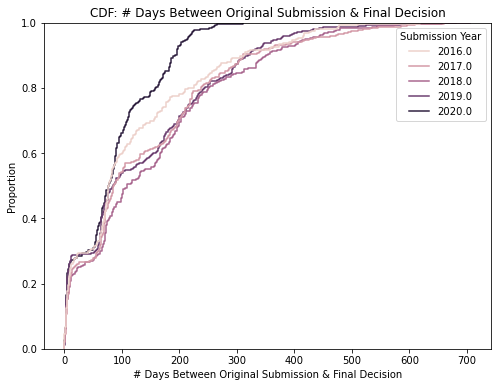

In [17]:
fig, ax = plt.subplots(figsize=(8,6))
sns.ecdfplot(data=report_df[datetime.now().year - report_df['Submission Year'] < 5], x="# Days Between Original Submission & Final Decision", hue="Submission Year", ax=ax)
ax.set_title('CDF: # Days Between Original Submission & Final Decision')

In [18]:
accept_subms_df = pd.pivot_table(report_df[report_df['Accept or Reject Final Decision'] == 'Accept'], values='Manuscript ID - Original', index=['Latest Decision Year'], columns=['Submission Year'], aggfunc='count', margins=True).fillna('')
accept_subms_df

Submission Year,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0,2020.0,All
Latest Decision Year,,,,,,,,,,,,
2010.0,7,,,,,,,,,,,7
2011.0,22,12,,,,,,,,,,34
2012.0,3,20,16,,,,,,,,,39
2013.0,,1,18,11,,,,,,,,30
2014.0,,,4,17,9,,,,,,,30
2015.0,,,,,30,21,,,,,,51
2016.0,,,,,2,39,35,,,,,76
2017.0,,,,,,2,45,65,,,,112
2018.0,,,,,,1,5,55,52,,,113


In [39]:
def redefine_status(r):
    if pd.notnull(r['Manuscript Status']):
        if 'Withdrawn' not in r['Manuscript Status'] and 'Reject & Resubmit' != r['Manuscript Status'] and not pd.notnull(r['Accept or Reject Final Decision']) and pd.notnull(r['Revised']):
            return 'Still in process'
        else:
            return r['Manuscript Status']
    else: # Papers without Manuscript status are still in process
        return 'Still in process' 

last_two_year_df = report_df[datetime.now().year - report_df['Submission Year'] < 3].copy()
last_two_year_df['Manuscript Status'] = last_two_year_df.apply(redefine_status, axis=1)
last_two_year_stats_df = last_two_year_df.groupby(['Manuscript Status', 'Submission Year']).size().unstack(fill_value=0)
last_two_year_stats_df.loc['Total processed (%)'] = (((last_two_year_stats_df.sum() - last_two_year_stats_df.loc['Still in process'])/last_two_year_stats_df.sum()) * 100).round(2)
last_two_year_stats_df

Submission Year,2018.0,2019.0,2020.0
Manuscript Status,,,
Accept-Not a Candidate for Best Paper Award,146.00,160.00,79.00
Accept-Possible Candidate for Best Paper Award,9.00,4.00,3.00
Reject,244.00,243.00,241.00
Reject & Resubmit,45.00,49.00,67.00
Still in process,10.00,15.00,386.00
Withdrawn,3.00,4.00,8.00
Total processed (%),97.81,96.84,50.77
